# Hii!

*In this Kernel, we'll be doing some simple exploratory text analysis under one of my favorite classics of all time, **Lewis Carroll's** masterpiece, **Alice in Wonderland***

![](https://s8296.pcdn.co/wp-content/uploads/2015/02/20150225_alice.jpg)

It's just a simple work, feel free to ask anything and suggest improvements

My email: rbiasuz@ucs.br

**Hope you enjoy it!!
**
:D




# First, we'll start importing the packages:

In [1]:
import requests
import numpy as np # linear algebra
import pandas as pd # dataframes
from bs4 import BeautifulSoup # work with html
import nltk # natural language packages
import string # to do some work with strings
import matplotlib.pyplot as plt # data visualization
%matplotlib inline  
import seaborn as sns # data visualization
sns.set(color_codes=True) # data visualization
from textblob import TextBlob # sentiment analysis 

PS: Another option of sentiment analysis that I like to use, especialy for social media,is **vaderSentiment**, I'll not be using in this Kernel, but bellow is what we would need
* from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer*

# Now, we need our **data**...
 Fortunately, there's this link: [](http://www.gutenberg.org/).
 Acording to the site:
*"**Project Gutenberg** offers over 58,000 free eBooks. Choose among free epub and Kindle eBooks, download them or read them online. You will find the world's great literature here, with focus on older works for which U.S. copyright has expired. Thousands of volunteers digitized and diligently proofread the eBooks, for enjoyment and education."*

And they have our book! So, we'll use request and BeautifulSoup to acess the URL, colect the HTML and extract just the text that we need!!


In [2]:
# Getting the Alice's HTML
try:
    r = requests.get('https://www.gutenberg.org/files/11/11-h/11-h.htm', verify=False)
except:
    print("Ops, not here")
    
# P.S.: Unhappy, we cannot run this code here in Kaggle, but I'll continue the process, and import the already extracted DataSet

Ops, not here


# This would be the next steps:

    #Setting the correct text encoding of the HTML page
        r.encoding = 'utf-8'

    #Extracting the HTML from the request object
        html = r.text

If we print part of the HTML here, our return is:

**print(html[0:500])**

 ?xml version="1.0" encoding="utf-8"?>
 !DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >
 html xmlns="http://www.w3.org/1999/xhtml" lang="en">
   head>
    meta content="pg2html (binary v0.17)" name="linkgenerator" />
     title>
       Alice's Adventures in Wonderland, by Lewis Carroll
    /title>
     style type="text/css">
    <!--
    body { margin:5%; background:#faebd0; text-align:justify}
    P { text-in

# Of course we don't want all this, so...

    #Creating a BeautifulSoup object from the HTML
        soup = BeautifulSoup(html)

    #Getting the text out of the soup
        text = BeautifulSoup.get_text(soup)

# Printing a part of our beloved text
print(text[3670:4480])

***There was nothing so very remarkable in that; nor did Alice think it so
      very much out of the way to hear the Rabbit say to itself, ‘Oh dear! Oh
      dear! I shall be late!’ (when she thought it over afterwards, it occurred
      to her that she ought to have wondered at this, but at the time it all
      seemed quite natural); but when the Rabbit actually took a watch out of
      its waistcoat-pocket, and looked at it, and then hurried on, Alice started
      to her feet, for it flashed across her mind that she had never before seen
      a rabbit with either a waistcoat-pocket, or a watch to take out of it, and
      burning with curiosity, she ran across the field after it, and fortunately
      was just in time to see it pop down a large rabbit-hole under the hedge.***

But we need to do some filtering in this text... 
For this, we tokenize our data:

    #Creating a tokenizer that finds only words
        tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

    #Tokenizing the text
        tokens = tokenizer.tokenize(text)

Printing out the first 8 words / tokens
**print(tokens[0:8])**

***['Alice', 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll']***

# Ok,
Now I'll import the tokens that we created with the commands we had written
This isn't a part of the analysis, but we need here in Kaggle:

If you wish to know how I saved, here's the code:


    with open("tokens.txt", "w") as f:
        for s in tokens:
                f.write(str(s) +"\n")




In [3]:
tokens = []
with open("../input/tokens.txt", "r") as f:
    for line in f:
        tokens.append(str(line.strip()))
print(tokens[0:8])

['Alice', 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll']


# Great! Now we can proceed direct coding!

In [4]:
# Looping through the tokens and make them lower case
words = []
for word in tokens:
    words.append(word.lower())
words[0:5]


['alice', 's', 'adventures', 'in', 'wonderland']

In [5]:
# Removing the stopwords
from nltk.corpus import stopwords
#Here you may need download the stopwords: nltk.download('stopwords')
sw = stopwords.words('english')
words_ns = []
for word in words:
    if word not in sw:
        words_ns.append(word)
words_ns[0:5]


['alice', 'adventures', 'wonderland', 'lewis', 'carroll']

In [6]:
# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)
freqdist.most_common(30)

[('said', 462),
 ('alice', 405),
 ('little', 129),
 ('one', 106),
 ('gutenberg', 93),
 ('know', 88),
 ('project', 87),
 ('like', 85),
 ('would', 83),
 ('went', 83),
 ('could', 78),
 ('queen', 76),
 ('thought', 74),
 ('time', 71),
 ('see', 70),
 ('well', 63),
 ('king', 63),
 ('turtle', 60),
 ('way', 58),
 ('began', 58),
 ('mock', 57),
 ('tm', 57),
 ('hatter', 56),
 ('quite', 55),
 ('gryphon', 55),
 ('must', 54),
 ('rabbit', 53),
 ('think', 53),
 ('work', 53),
 ('much', 52)]

In [7]:
# What are doing gutenberg and project doing there? I also dislike some of these words:
new_stopwords = ['gutenberg', 'project', 'would', 'went', '1', 'e', 'tm', 'could', 'must']
word_final = []
for word in words_ns:
    if word not in new_stopwords:
        word_final.append(word)

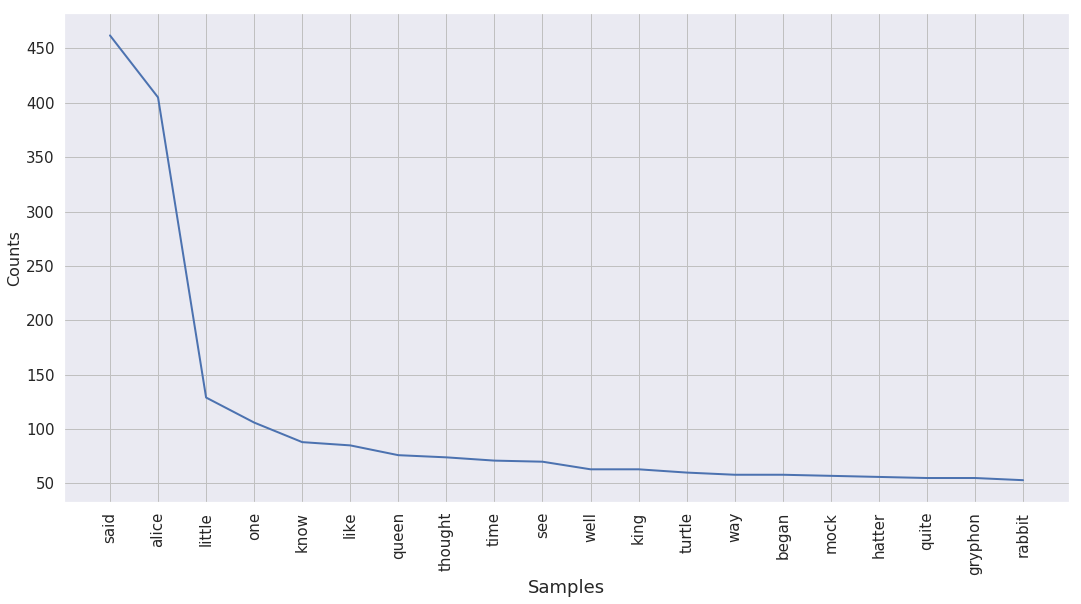

In [8]:
# Plotting the word frequency distribution
freqdist = nltk.FreqDist(word_final)
plt.figure(figsize=(18,9))
plt.xlabel('Words', fontsize=18)
plt.ylabel('Freq', fontsize=16)
plt.xticks(size = 15)
plt.yticks(size = 15)
freqdist.plot(20)

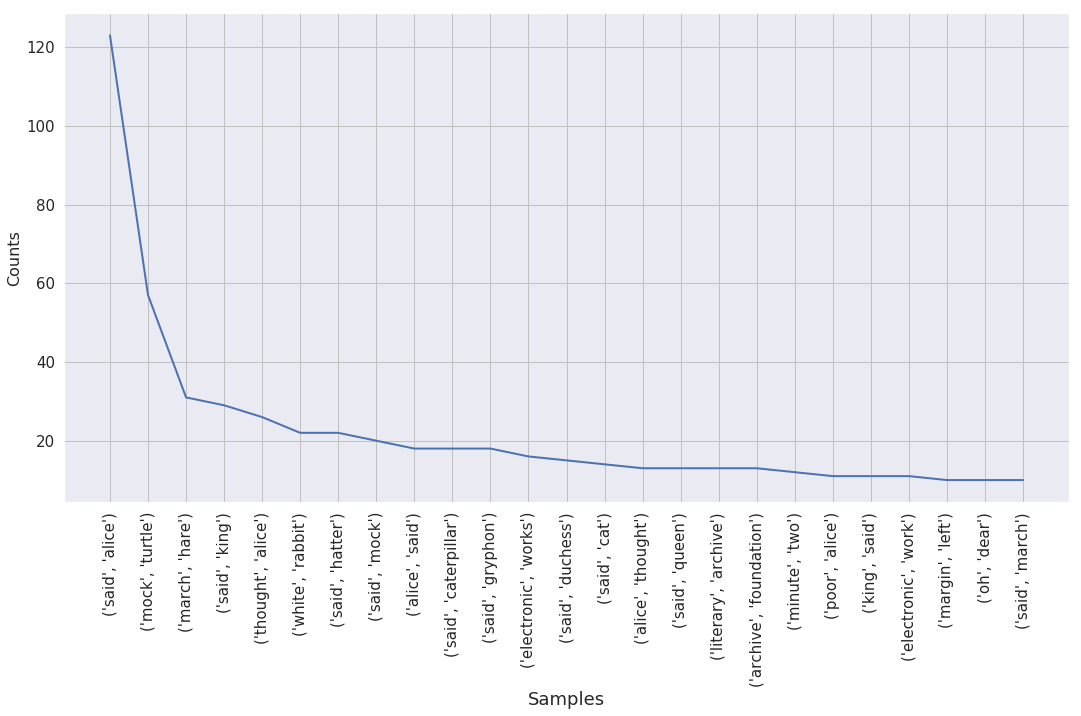

In [9]:
# what about bigrams?
bigrams = list(nltk.bigrams(word_final))
freqdist = nltk.FreqDist(bigrams)
plt.figure(figsize=(18,9))
plt.xlabel('Words', fontsize=18)
plt.ylabel('Freq', fontsize=16)
plt.xticks(size = 15)
plt.yticks(size = 15)
freqdist.plot(25)


In [10]:
# what about trigrams?
trigrams = list(nltk.trigrams(word_final))
freqdist = nltk.FreqDist(trigrams)
freqdist.most_common(6)

[(('said', 'mock', 'turtle'), 20),
 (('literary', 'archive', 'foundation'), 13),
 (('said', 'march', 'hare'), 10),
 (('alice', 'adventures', 'wonderland'), 7),
 (('poor', 'little', 'thing'), 6),
 (('join', 'dance', 'join'), 6)]

# oK, now that we saw how "said alice" is frequent...

Let's do some **Sentiment Analysis**...

Firts, I'm separating the text in 30 parts (from the beginning to the end)

In [11]:
#returning the text to a string format
all_text = "".join([" " + i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()
#here I'm at the start of the text, because the first charachters are descriptions of the site
all_text[2000:2500]
size = len(all_text)
all_text = all_text[2165:size]
size = len(all_text)
#Dividing in 30 parts
part_size = size/30
df = pd.DataFrame()
parts = []
for i in range(30):
    parts.append(all_text[int((i*part_size)):int((part_size*(i+1)))])

In [12]:
#turning into a dataframe (to easily manipulate
d = {'sentence':parts}
df = pd.DataFrame(d)

In [13]:
#The last five parts also are texts from the site, so we're droping it
df = df.drop(df.index[29])
df = df.drop(df.index[28])
df = df.drop(df.index[27])
df = df.drop(df.index[26])
df = df.drop(df.index[25])

In [14]:
#defining the diferent sentiment analysis methods:

#TextBlob:
def analize_sentiment_textblop(sentence):
    analysis = TextBlob(sentence)
    return analysis.sentiment.polarity

#Vader:
# analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_positive(sentence):
    score = analyser.polarity_scores(sentence)
    retorno = score.get('pos')
    return retorno

def sentiment_analyzer_negative(sentence):
    score = analyser.polarity_scores(sentence)
    retorno = score.get('neg')
    return retorno

def sentiment_analyzer_vader(sentence):
    score = analyser.polarity_scores(sentence)
    #print("{:-<40} {}".format(sentence, str(score)))
    retorno = score.get('compound')
    return retorno

    #We would not use vader here, but you may try...
         df['vader'] = df['sentence'].apply(lambda x: sentiment_analyzer_vader(x))


In [15]:
df['textblop'] = df['sentence'].apply(lambda x: analize_sentiment_textblop(x))

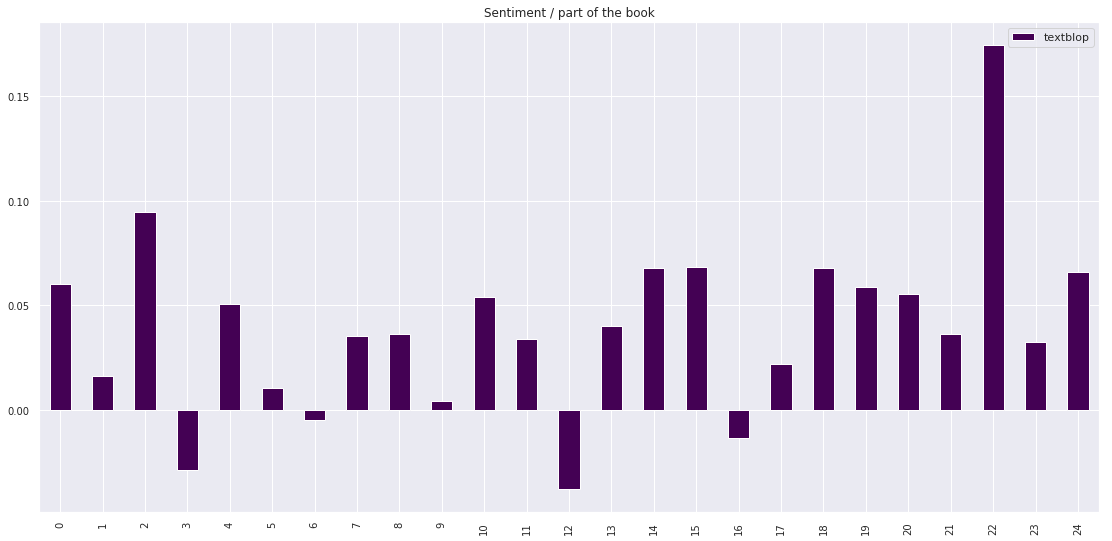

In [16]:
df[['sentence','textblop']].plot(kind='bar', title='Sentiment / part of the book', figsize=(19,9), fontsize=10, colormap='viridis')
plt.show()

# Hm... Looks like we have a happy ending... But, of course, we need to investigate it...

For now this is what I have...

# Thanks for reading!